<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.888238,83.688443,52.181875,1471.690366,1691.448922,-402.094415,2093.543337
1,0.0,1.0,76.838729,20.782757,74.525497,178.371292,360.518275,228.403656,132.114619
2,0.0,2.0,52.060749,89.778908,35.596292,-2370.553870,-2183.117922,-167.798730,-2015.319192
3,0.0,3.0,99.464239,88.746584,75.758063,-1843.383188,-1569.414301,-802.037058,-767.377244
4,0.0,4.0,80.522315,20.614141,30.524982,-24.428696,117.232741,152.928375,-35.695634
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,66.460852,40.780639,83.410185,768.852364,969.504040,519.221892,450.282148
29996,999.0,26.0,65.606847,48.894231,67.560403,-377.920221,-185.858739,308.267128,-494.125867
29997,999.0,27.0,38.392964,57.129358,37.420900,274.059386,417.002607,-260.209139,677.211746
29998,999.0,28.0,91.538672,56.184607,63.975913,1471.883241,1693.582433,446.477259,1247.105174


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.888238,83.688443,52.181875,1471.690366,1691.448922,-402.094415,2093.543337
1,0.0,1.0,76.838729,20.782757,74.525497,178.371292,360.518275,228.403656,132.114619
2,0.0,2.0,52.060749,89.778908,35.596292,-2370.553870,-2183.117922,-167.798730,-2015.319192
3,0.0,3.0,99.464239,88.746584,75.758063,-1843.383188,-1569.414301,-802.037058,-767.377244
4,0.0,4.0,80.522315,20.614141,30.524982,-24.428696,117.232741,152.928375,-35.695634
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,66.460852,40.780639,83.410185,768.852364,969.504040,519.221892,450.282148
29996,999.0,26.0,65.606847,48.894231,67.560403,-377.920221,-185.858739,308.267128,-494.125867
29997,999.0,27.0,38.392964,57.129358,37.420900,274.059386,417.002607,-260.209139,677.211746
29998,999.0,28.0,91.538672,56.184607,63.975913,1471.883241,1693.582433,446.477259,1247.105174


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    73.888238  83.688443  52.181875  1471.690366  1691.448922   
      1.0    76.838729  20.782757  74.525497   178.371292   360.518275   
      2.0    52.060749  89.778908  35.596292 -2370.553870 -2183.117922   
      3.0    99.464239  88.746584  75.758063 -1843.383188 -1569.414301   
      4.0    80.522315  20.614141  30.524982   -24.428696   117.232741   
...                ...        ...        ...          ...          ...   
999.0 25.0   66.460852  40.780639  83.410185   768.852364   969.504040   
      26.0   65.606847  48.894231  67.560403  -377.920221  -185.858739   
      27.0   38.392964  57.129358  37.420900   274.059386   417.002607   
      28.0   91.538672  56.184607  63.975913  1471.883241  1693.582433   
      29.0   29.874639  23.705282  44.794232   104.165151   212.539303   

                  y_hat        e_hat  
rep   index                           
0.0   0.0   -402.094415  2093.543337  
      1.0    228.403656   132.114619  
      2.0   -167.798730 -2015.319192  
      3.0   -802.037058  -767.377244  
      4.0    152.928375   -35.695634  
...                 ...          ...  
999.0 25.0   519.221892   450.282148  
      26.0   308.267128  -494.125867  
      27.0  -260.209139   677.211746  
      28.0   446.477259  1247.105174  
      29.0    -3.481253   216.020556  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    73.888238  83.688443  52.181875  1471.690366  1691.448922   
      1.0    76.838729  20.782757  74.525497   178.371292   360.518275   
      2.0    52.060749  89.778908  35.596292 -2370.553870 -2183.117922   
      3.0    99.464239  88.746584  75.758063 -1843.383188 -1569.414301   
      4.0    80.522315  20.614141  30.524982   -24.428696   117.232741   
...                ...        ...        ...          ...          ...   
999.0 25.0   66.460852  40.780639  83.410185   768.852364   969.504040   
      26.0   65.606847  48.894231  67.560403  -377.920221  -185.858739   
      27.0   38.392964  57.129358  37.420900   274.059386   417.002607   
      28.0   91.538672  56.184607  63.975913  1471.883241  1693.582433   
      29.0   29.874639  23.705282  44.794232   104.165151   212.539303   

                  y_hat        e_hat  
rep   index                           
0.0   0.0   -402.094415  2093.543337  
      1.0    228.403656   132.114619  
      2.0   -167.798730 -2015.319192  
      3.0   -802.037058  -767.377244  
      4.0    152.928375   -35.695634  
...                 ...          ...  
999.0 25.0   519.221892   450.282148  
      26.0   308.267128  -494.125867  
      27.0  -260.209139   677.211746  
      28.0   446.477259  1247.105174  
      29.0    -3.481253   216.020556  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.888238,83.688443,52.181875,1471.690366,1691.448922,-402.094415,2093.543337
1,0.0,1.0,76.838729,20.782757,74.525497,178.371292,360.518275,228.403656,132.114619
2,0.0,2.0,52.060749,89.778908,35.596292,-2370.553870,-2183.117922,-167.798730,-2015.319192
3,0.0,3.0,99.464239,88.746584,75.758063,-1843.383188,-1569.414301,-802.037058,-767.377244
4,0.0,4.0,80.522315,20.614141,30.524982,-24.428696,117.232741,152.928375,-35.695634
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,66.460852,40.780639,83.410185,768.852364,969.504040,519.221892,450.282148
29996,999.0,26.0,65.606847,48.894231,67.560403,-377.920221,-185.858739,308.267128,-494.125867
29997,999.0,27.0,38.392964,57.129358,37.420900,274.059386,417.002607,-260.209139,677.211746
29998,999.0,28.0,91.538672,56.184607,63.975913,1471.883241,1693.582433,446.477259,1247.105174


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    73.888238  83.688443  52.181875  1471.690366  1691.448922   
      1.0    76.838729  20.782757  74.525497   178.371292   360.518275   
      2.0    52.060749  89.778908  35.596292 -2370.553870 -2183.117922   
      3.0    99.464239  88.746584  75.758063 -1843.383188 -1569.414301   
      4.0    80.522315  20.614141  30.524982   -24.428696   117.232741   
...                ...        ...        ...          ...          ...   
999.0 25.0   66.460852  40.780639  83.410185   768.852364   969.504040   
      26.0   65.606847  48.894231  67.560403  -377.920221  -185.858739   
      27.0   38.392964  57.129358  37.420900   274.059386   417.002607   
      28.0   91.538672  56.184607  63.975913  1471.883241  1693.582433   
      29.0   29.874639  23.705282  44.794232   104.165151   212.539303   

                  y_hat        e_hat  
rep   index                           
0.0   0.0   -402.094415  2093.543337  
      1.0    228.403656   132.114619  
      2.0   -167.798730 -2015.319192  
      3.0   -802.037058  -767.377244  
      4.0    152.928375   -35.695634  
...                 ...          ...  
999.0 25.0   519.221892   450.282148  
      26.0   308.267128  -494.125867  
      27.0  -260.209139   677.211746  
      28.0   446.477259  1247.105174  
      29.0    -3.481253   216.020556  

[30000 rows x 7 columns]

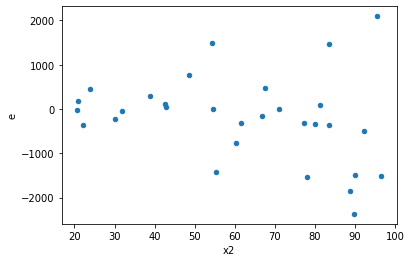

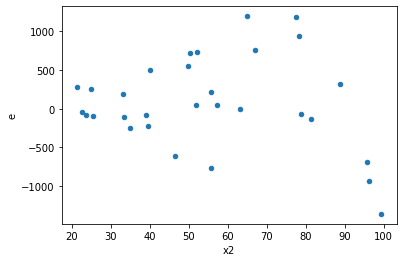

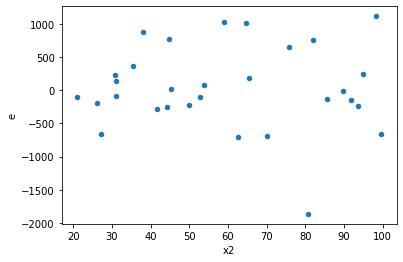

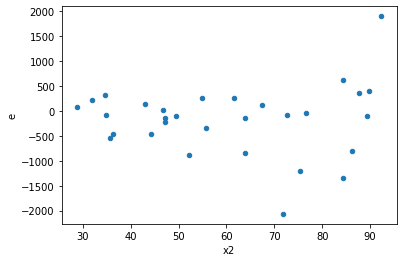

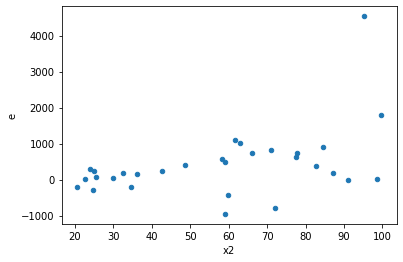

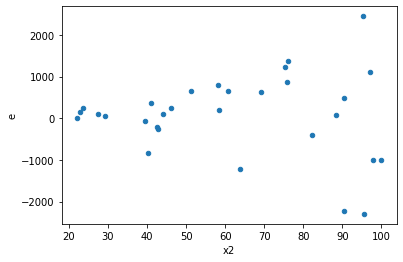

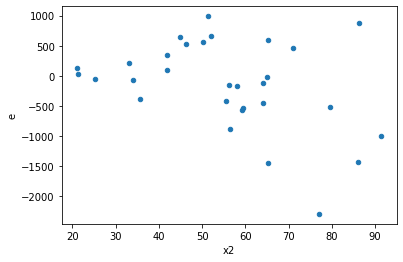

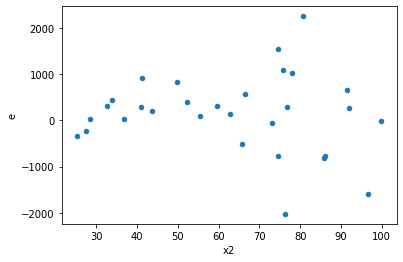

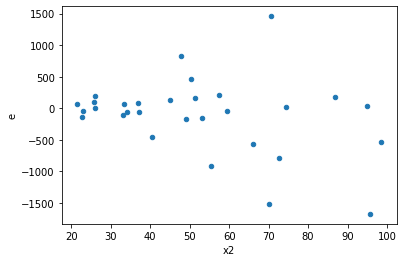

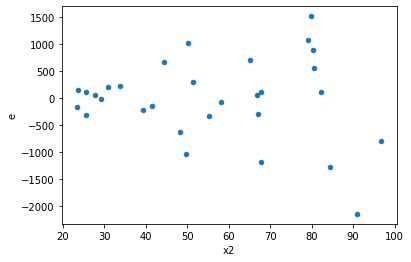

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,9.0,9.0,888356.9116733067,2218597.9590240614,98706.3235192563,246510.88433600683,2.497417344167578,0.18893729478196608,0.905531352609017,0.09446864739098304,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,370876.36302305915,15873199.489903018,41208.4847803399,1763688.8322114465,42.799167249480675,5.091122499356615e-06,0.9999974544387503,2.5455612496783075e-06,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,4645131.619611892,5972652.526561322,516125.7355124324,663628.0585068135,1.2857875762539417,0.714155343924602,0.642922328037699,0.357077671962301,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,4106197.9440666204,5117835.29722007,456244.2160074023,568648.3663577855,1.24636838431407,0.7482068653420209,0.6258965673289896,0.3741034326710104,Reject005=1 : Homoscedasticity
11.0,9.0,9.0,4412034.80371589,4538571.440932714,490226.0893017656,504285.7156591905,1.0286798819243794,0.9670932779139649,0.5164533610430175,0.48354663895698247,Reject005=1 : Homoscedasticity
12.0,9.0,9.0,4586754.163349633,11238727.686062926,509639.3514832926,1248747.5206736585,2.4502572594506487,0.19802413612760894,0.9009879319361955,0.09901206806380447,Reject005=1 : Homoscedasticity
13.0,9.0,9.0,3153951.560266982,11172782.498217365,350439.0622518869,1241420.277579707,3.5424711777347615,0.07337700854506601,0.963311495727467,0.03668850427253301,Reject005=1 : Homoscedasticity
14.0,9.0,9.0,1823422.3315942073,13983013.736407578,202602.48128824527,1553668.1929341753,7.6685546152011375,0.005640331970747869,0.9971798340146261,0.0028201659853739347,Reject005=0 : Heteroscedasticity
17.0,9.0,9.0,7998401.841214208,8402835.498017645,888711.3156904676,933648.3886686271,1.050564308324629,0.942630023743876,0.528684988128062,0.471315011871938,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,11520717.87255064,719542.1740045281,1280079.763616738,79949.13044494757,0.062456366171323,0.0003228392324437864,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,4233762.982021674,448451.057539639,470418.1091135193,49827.895282182115,0.10592257040461395,0.0025951889048564493,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,888356.9116733067,2218597.9590240614,98706.3235192563,246510.88433600683,2.497417344167578,0.18893729478196608,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,2125468.083300772,2059600.321191127,236163.12036675247,228844.48013234744,0.9690102323214588,0.9633674717857583,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,370876.36302305915,15873199.489903018,41208.4847803399,1763688.8322114465,42.799167249480675,5.091122499356615e-06,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,4645131.619611892,5972652.526561322,516125.7355124324,663628.0585068135,1.2857875762539417,0.714155343924602,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,7973024.809298039,579311.2941067108,885891.6454775599,64367.92156741231,0.07265891025839094,0.0005947445020487668,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,6541633.81474401,6300185.113815881,726848.2016382233,700020.5682017646,0.9630904590862404,0.9562436309461543,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,7308294.802513841,368490.4477537142,812032.7558348712,40943.38308374603,0.05042085160918307,0.00013392723568523212,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      555
Reject005=0 : Heteroscedasticity    445
Name: Result_test, dtype: int64